# MSE vs MAE 回帰モデル比較

このノートブックでは、線形回帰モデルを以下の2種類の損失関数で学習し、外れ値の影響を比較します。

1. **MSE (Mean Squared Error; 二乗誤差)**
2. **MAE (Mean Absolute Error; 絶対値誤差)**

MSE は外れ値があるとその影響をより強く受け、MAE は外れ値に比較的ロバストな挙動を示します。

In [ ]:
# ライブラリ読み込み
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# 疑似データセット生成用関数の定義
def generate_linear_data(
    num_samples=50, # データのサンプル数
    slope=2.0,      # 真の直線(傾き)
    intercept=5.0,  # 真の直線(切片)
    noise_std=1.0,  # ノイズの標準偏差
    num_outliers=2, # 外れ値の個数
    outlier_magnitude=40.0, # 外れ値をどの程度離れた位置に置くか（大きいほど離れる）
    random_seed=42  # 乱数シード
):
    """
    線形回帰モデルの例として、外れ値を含む疑似データを生成する関数。

    Returns
    -------
    X : ndarray (shape: (num_samples,))
        入力データ（説明変数）
    y : ndarray (shape: (num_samples,))
        出力データ（目的変数）
    """
    np.random.seed(random_seed)

    # Xを0から10まで等間隔に生成
    X = np.linspace(0, 10, num_samples)
    # 真の線形関係 + ガウスノイズ
    y = slope * X + intercept + np.random.randn(num_samples) * noise_std

    # 外れ値をランダムに選んだサンプルに付与
    outlier_indices = np.random.choice(num_samples, size=num_outliers, replace=False)
    for idx in outlier_indices:
        y[idx] += outlier_magnitude

    return X, y

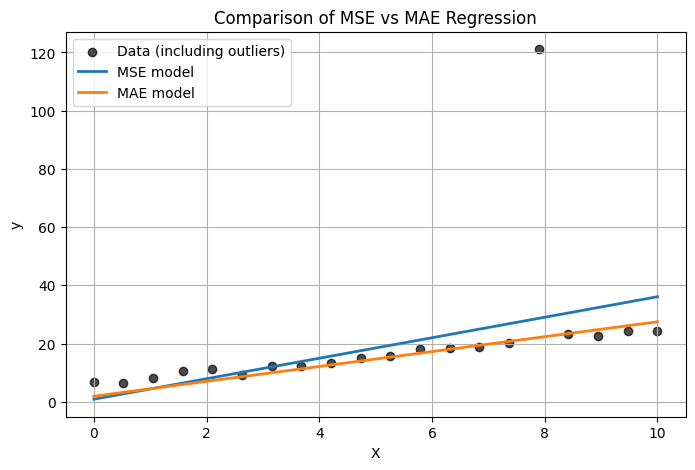

--- MSE (squared_error) ---
Coefficient (slope): 3.521
Intercept: 0.858

--- MAE (absolute_error) ---
Coefficient (slope): 2.558
Intercept: 1.882


In [ ]:
# データ生成と MSE vs MAE 回帰モデルの可視化

num_samples = 20 # サンプル数
num_outliers = 1 # 外れ値の個数


# 1. データ生成
X, y = generate_linear_data(
    num_samples=num_samples,  # サンプル数
    slope=2.0,           # 真の傾き
    intercept=5.0,       # 真の切片
    noise_std=1.0,       # ノイズのばらつき
    num_outliers=num_outliers, # 外れ値の個数
    outlier_magnitude=100,# 外れ値の大きさ
    random_seed=0        # 乱数シード(固定生成)
)

# 2. MSE (二乗誤差) モデルの学習
model_mse = SGDRegressor(
    loss='squared_error',  # MSE
    max_iter=1000,
    tol=1e-3,
    random_state=0
)
model_mse.fit(X.reshape(-1, 1), y)

# 3. MAE (絶対値誤差) モデルの学習
# ただし epsilon_insensitive で代替
model_mae = SGDRegressor(
    loss="epsilon_insensitive", # ≒ epsilon=0.0とすることでMAE相当
    epsilon=0.0,         # 絶対値損失に近くなるように epsilon=0
    max_iter=1000,
    tol=1e-3,
    random_state=0
)
model_mae.fit(X.reshape(-1, 1), y)

# 4. 予測および可視化
X_plot = np.linspace(0, 10, 100)
y_pred_mse = model_mse.predict(X_plot.reshape(-1, 1))
y_pred_mae = model_mae.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='black', alpha=0.7, label='Data (including outliers)')
plt.plot(X_plot, y_pred_mse, label='MSE model', linewidth=2)
plt.plot(X_plot, y_pred_mae, label='MAE model', linewidth=2)
plt.title('Comparison of MSE vs MAE Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 5. 回帰係数の確認
print('--- MSE (squared_error) ---')
print(f'Coefficient (slope): {model_mse.coef_[0]:.3f}')
print(f'Intercept: {model_mse.intercept_[0]:.3f}')

print('\n--- MAE (absolute_error) ---')
print(f'Coefficient (slope): {model_mae.coef_[0]:.3f}')
print(f'Intercept: {model_mae.intercept_[0]:.3f}')